# Preliminary Data Exploration

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

In [4]:
print(df_yearly.shape)
print(df_monthly.shape)

(12, 4)
(98, 3)


In [5]:
print(df_yearly.columns)
print(df_monthly.columns)

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Index(['date', 'births', 'deaths'], dtype='object')


### Check for NaN Values and Duplicates

In [17]:
print(df_yearly.isna().values.any())
print(df_yearly.duplicated().values.any())

False
False


In [18]:
print(df_monthly.isna().values.any())
print(df_monthly.duplicated().values.any())

False
False


### Descriptive Statistics

In [10]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [23]:
df_yearly.head(12)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [11]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [28]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


### Percentage of Women Dying in Childbirth

In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013. [[source]](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [27]:
print(f'{round(df_yearly.deaths.sum() / df_yearly.births.sum() * 100, 2)}%')

7.08%


# Visualize the Total Number of Births and Deaths Over Time

### Plot the Monthly Data on Twin Axes

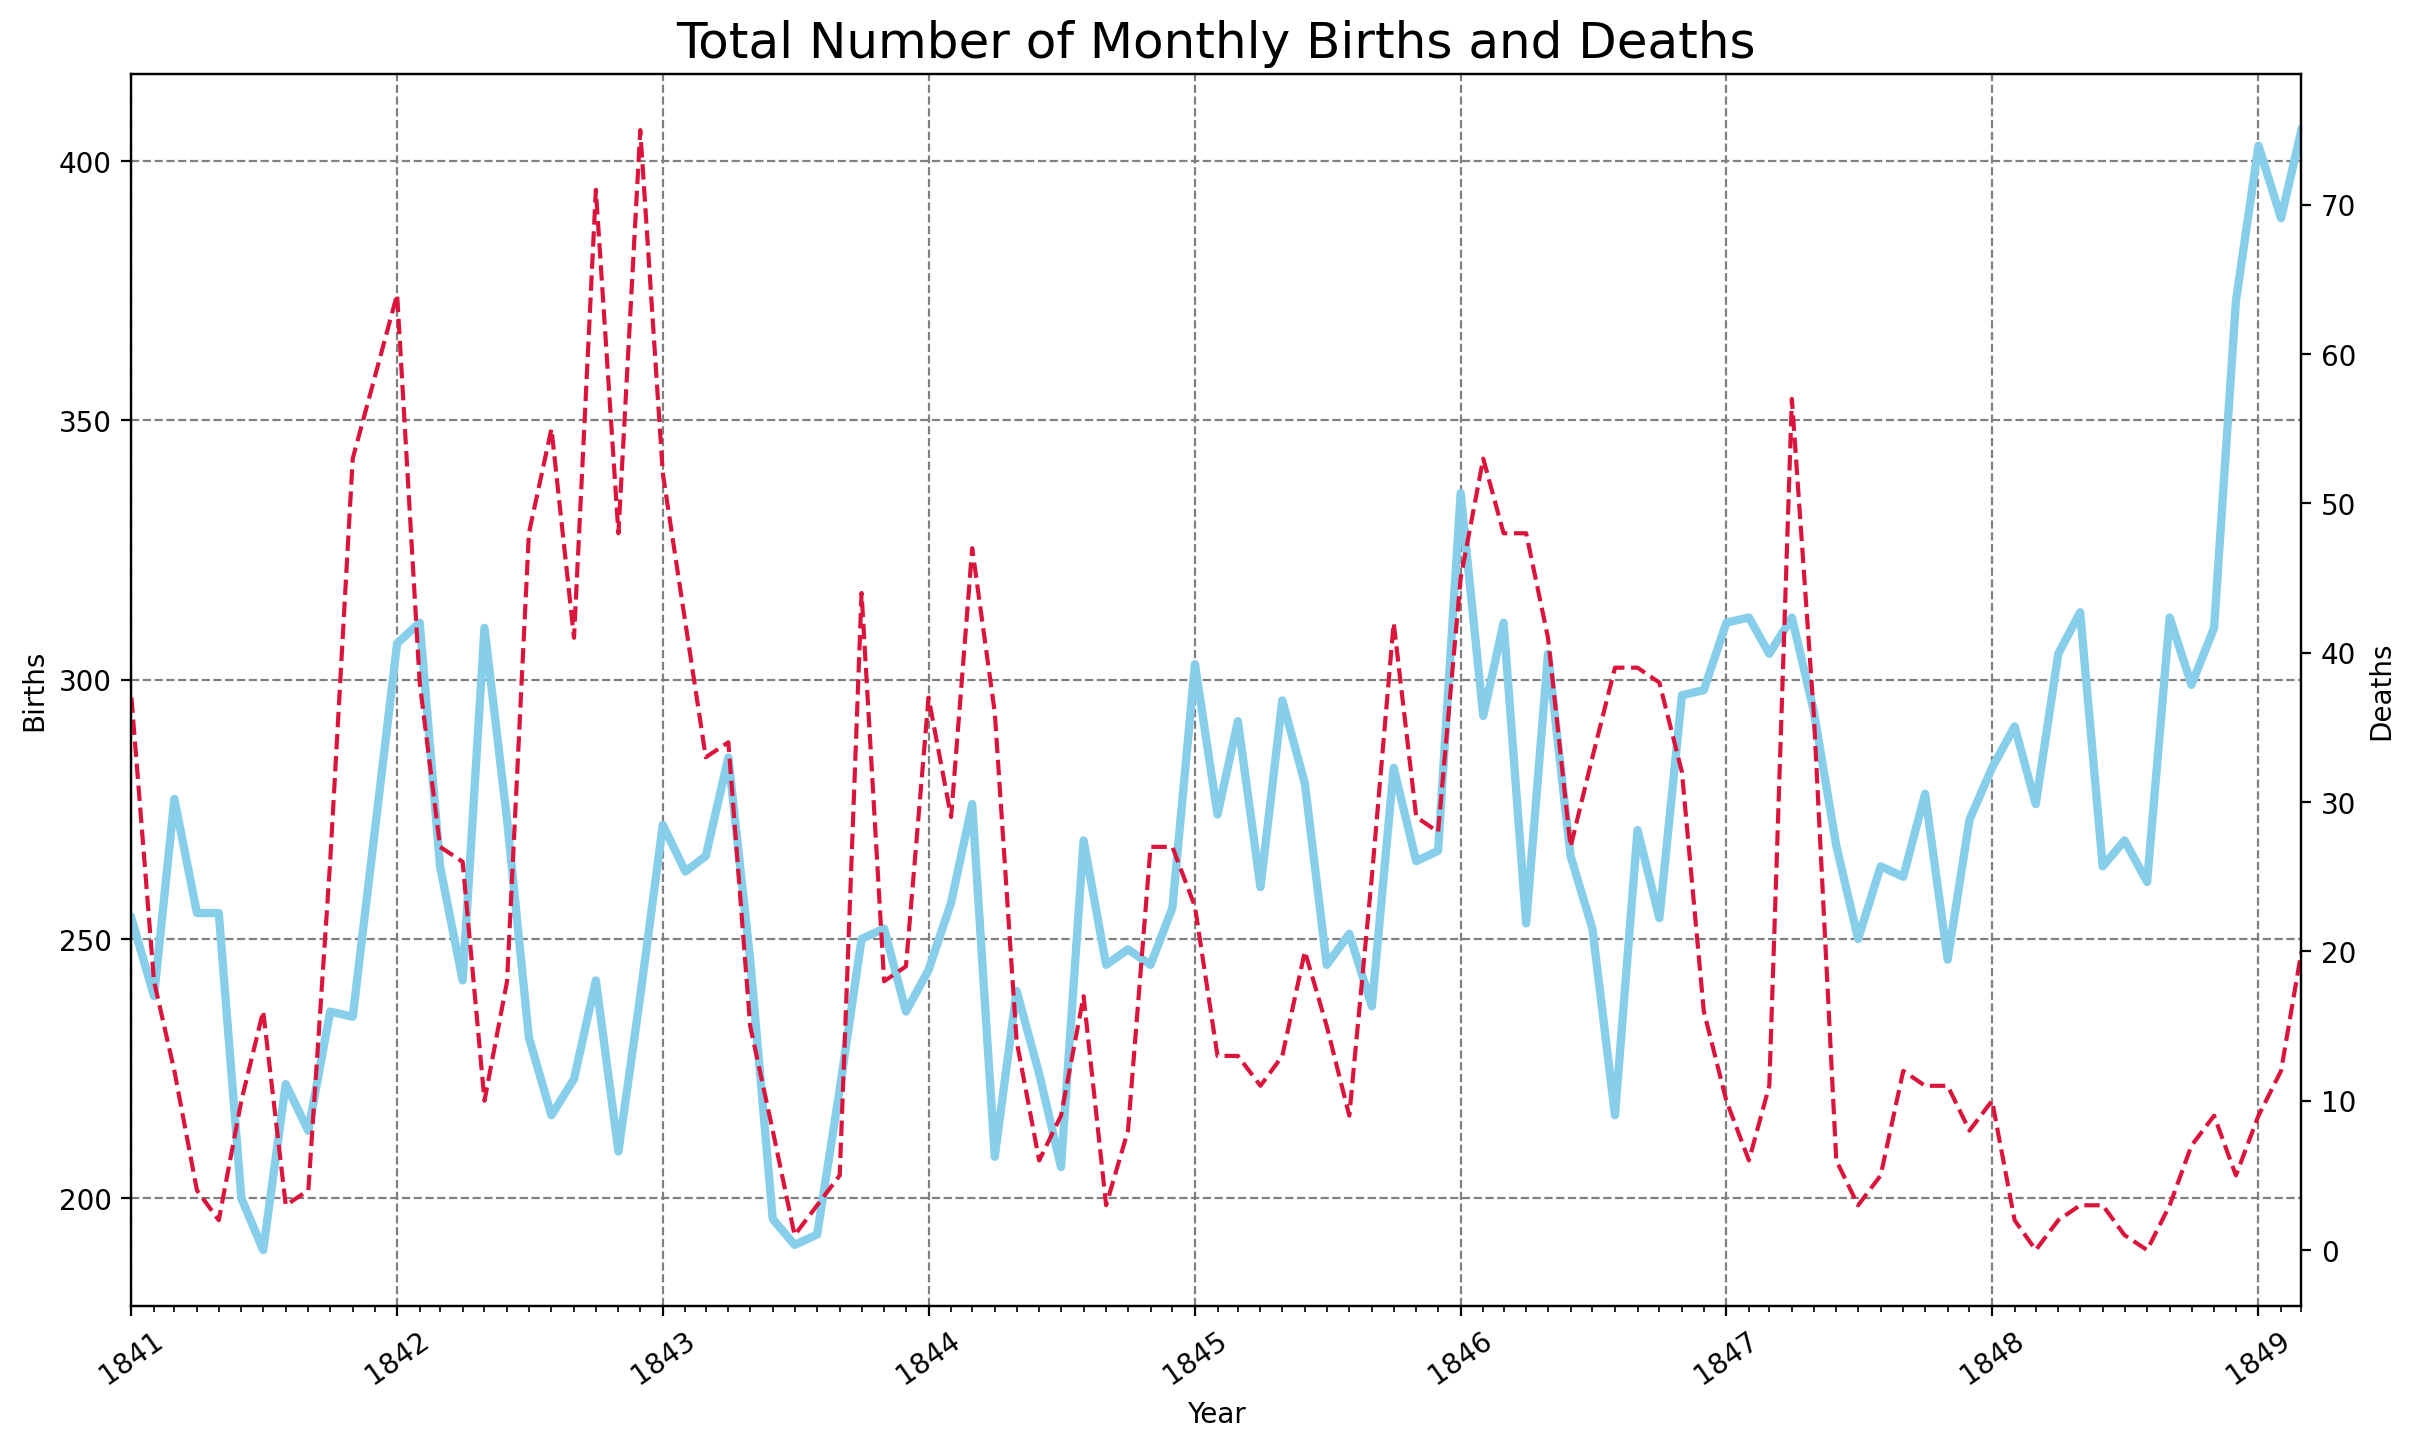

In [42]:
plt.figure(figsize=(14, 8),
           dpi=200)
plt.xticks(rotation=35)

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(df_monthly.date,
        df_monthly.births,
        'skyblue',
        linewidth=3.0,
        label='Births')

ax2.plot(df_monthly.date,
        df_monthly.deaths,
        'crimson',
        linestyle='dashed',
        label='Deaths')

ax.grid(color='grey', linestyle='--')
ax.set_xlabel('Year')
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax.set_ylabel('Births')
ax2.set_ylabel('Deaths')
ax.set_title('Total Number of Monthly Births and Deaths', fontsize=18)

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.show()

# The Yearly Data Split by Clinic

In [48]:
df_yearly.head(1)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1


In [49]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Total Yearly Births per Clinic')

line.show()

In [50]:
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths per Clinic')

line.show()

### Calculate the Proportion of Deaths at Each Clinic

In [57]:
df_yearly['pct_deaths'] = round(df_yearly.deaths / df_yearly.births * 100, 2)

In [58]:
df_yearly.head(1)

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81


In [59]:
df_clinic = df_yearly.groupby(['clinic'], as_index=False).agg({'births': pd.Series.sum,
                                                   'deaths': pd.Series.sum})

In [60]:
df_clinic['death_rate'] = round(df_clinic.deaths / df_clinic.births * 100, 2)

In [61]:
df_clinic.head()

,clinic,births,deaths,death_rate
0,clinic 1,20042,1989,9.92
1,clinic 2,17791,691,3.88


### Plotting the Proportion of Yearly Deaths by Clinic

In [63]:
line2 = px.line(df_yearly,
                x='year',
                y='pct_deaths',
                color='clinic',
                title='Proportion of Yearly Deaths per Clinic')

line2.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

### Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



### Use Histograms to Visualize the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

### Use a Kernel Density Estimate (KDE) to visualize a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 

